In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/random_small_dataset_astan.csv')

In [4]:
df.head()

,Unnamed: 0,متن پيام,پاسخ,تاريخ دريافت,زمان دريافت
0,268527,سلام ایا خوردن آب دهان نا محرم اشکال دارد؟,سلام و تسلیت درمورد سوال هر گونه ارتباط با زن ...,1399/06/08,13:51
1,199873,سلام،لباس نجسی انداخیم ماشین لباسشویی،بعدازاتم...,سلام و تبریک در مورد یاد شده لباسها نجسند.,1400/03/30,12:30
2,43041,سلام اگر مرد آلت تناسلیش را تحریک کند ولی منی ...,سلام در مورد سؤال حکم استمناء را ندارد ولی تح...,1400/03/08,21:21
3,30952,با سلام. اگر لباسی نجس شده باشد آیا میتوان آن...,سلام و تسلیت تطهیر با آب خالی اشکال ندارد و پا...,1400/05/21,20:15
4,291618,یعنی باید غسل کنم,سلام و تبریک سؤال ناقص دریافت شده است؛ لطفا ...,1400/01/05,13:59


**Data preprocessing**

In [5]:
# open stopwords file
stopwords_fa = open('/content/drive/MyDrive/persian_stopwords.txt','r')
stopwords_fa = stopwords_fa.readlines()

In [6]:
def stopwords_editor(x):
  #output = x.replace('\u200c', ' ')
  output = x.strip()
  return output

In [7]:
stopwords_fa = [stopwords_editor(t) for t in stopwords_fa]

install hazm library

In [8]:
!pip install hazm 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 316 kB 17.5 MB/s 
     |████████████████████████████████| 233 kB 57.4 MB/s 
     |████████████████████████████████| 1.4 MB 57.2 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394488 sha256=eac234b8fc3d2368e96b3662db9ce14fa5ba8d1cfc63a5ec3ad555ed76f78e5c
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=154828 sha256=c70d870ac4a063e9109ccfabb31579c1ecc00485abf9ebf4f91610eb33b8c3ca
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [9]:
from __future__ import unicode_literals
from hazm import *

In [10]:
normalizer = Normalizer()
stemmer = Stemmer()

In [11]:
df.columns = ['id', 'question_text','response_text','date_recieved', 'time_recieved']

In [12]:
df.head()

,id,question_text,response_text,date_recieved,time_recieved
0,268527,سلام ایا خوردن آب دهان نا محرم اشکال دارد؟,سلام و تسلیت درمورد سوال هر گونه ارتباط با زن ...,1399/06/08,13:51
1,199873,سلام،لباس نجسی انداخیم ماشین لباسشویی،بعدازاتم...,سلام و تبریک در مورد یاد شده لباسها نجسند.,1400/03/30,12:30
2,43041,سلام اگر مرد آلت تناسلیش را تحریک کند ولی منی ...,سلام در مورد سؤال حکم استمناء را ندارد ولی تح...,1400/03/08,21:21
3,30952,با سلام. اگر لباسی نجس شده باشد آیا میتوان آن...,سلام و تسلیت تطهیر با آب خالی اشکال ندارد و پا...,1400/05/21,20:15
4,291618,یعنی باید غسل کنم,سلام و تبریک سؤال ناقص دریافت شده است؛ لطفا ...,1400/01/05,13:59


full sentence

In [13]:
df['full_text'] = [df.loc[i]['question_text']+df.loc[i]['response_text'] for i in range(len(df))]
df['full_text_norm'] = [normalizer.normalize(t) for t in df.full_text]
df['full_text_w_tok'] = [word_tokenize(t) for t in df.full_text_norm]
df['full_text_w_tok_stp'] = [[word for word in df.loc[i]['full_text_w_tok'] if word not in stopwords_fa] for i in range(len(df))]
df['full_text_w_tok_stp'] = [[stemmer.stem(t) for t in df.loc[i]['full_text_w_tok_stp']] for i in range(len(df))]
df['doc'] = [" ".join(df.loc[i]['full_text_w_tok_stp']) for i in range(len(df))]

In [14]:
df.head(2)

,id,question_text,response_text,date_recieved,time_recieved,full_text,full_text_norm,full_text_w_tok,full_text_w_tok_stp,doc
0,268527,سلام ایا خوردن آب دهان نا محرم اشکال دارد؟,سلام و تسلیت درمورد سوال هر گونه ارتباط با زن ...,1399/06/08,13:51,سلام ایا خوردن آب دهان نا محرم اشکال دارد؟سلام...,سلام ایا خوردن آب دهان نا محرم اشکال دارد؟ سلا...,"[سلام, ایا, خوردن, آب, دهان, نا, محرم, اشکال, ...","[سلا, خوردن, آب, ده, نا, محر, اشکال, سلا, تسل,...",سلا خوردن آب ده نا محر اشکال سلا تسل درمورد سو...
1,199873,سلام،لباس نجسی انداخیم ماشین لباسشویی،بعدازاتم...,سلام و تبریک در مورد یاد شده لباسها نجسند.,1400/03/30,12:30,سلام،لباس نجسی انداخیم ماشین لباسشویی،بعدازاتم...,سلام، لباس نجسی انداخیم ماشین لباسشویی، بعدازا...,"[سلام, ،, لباس, نجسی, انداخیم, ماشین, لباسشویی...","[سلا, لباس, نجس, انداخ, ماشین, لباسشو, بعدازات...",سلا لباس نجس انداخ ماشین لباسشو بعدازاتما شستش...


Install Fasttext and download pretrained word embedded vector

In [15]:
!git clone https://github.com/facebookresearch/fastText.git

Cloning into 'fastText'...
remote: Enumerating objects: 3930, done.
remote: Counting objects: 100% (944/944), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 3930 (delta 854), reused 804 (delta 804), pack-reused 2986
Receiving objects: 100% (3930/3930), 8.24 MiB | 17.77 MiB/s, done.
Resolving deltas: 100% (2505/2505), done.


In [16]:
!cd fastText

In [17]:
! pip install fastText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 3.1 MB/s 
  Using cached pybind11-2.10.0-py3-none-any.whl (213 kB)
  Created wheel for fastText: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3166381 sha256=326fe77dba57c73b3f8ecccd981e1fcbaa5e40ba110886e4cc119e8795e1649d
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fastText


In [18]:
import fasttext.util
fasttext.util.download_model('fa', if_exists='ignore')

'cc.fa.300.bin'

In [19]:
ft = fasttext.load_model('cc.fa.300.bin')
ft.get_dimension()

300

Vectorization

In [20]:
#vectorization

corpus = [df.loc[i]['doc'] for i in range(len(df))]

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
bow = cv.fit_transform(corpus).toarray()
print(f'Bag of words dim -> {np.shape(bow)}')

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
tfidf = tf.fit_transform(corpus).toarray()
print(f'TF-IDF dim -> {np.shape(tfidf)}')

def FastText_vec_builder(ft, text):
  l = []
  for w in text:
    try:
      l.append(list(ft[w]))
    except:
      # OOV situation !
      l.append(list(np.random.uniform(low=-0.25, high=0.25,size=300)))
  l = np.array(l)
  l = list(np.mean(l, axis = 0))    
  return l

FastText_Vec = np.array([FastText_vec_builder(ft, df.loc[i]['full_text_w_tok_stp']) for i in range(len(df))])
print(f'FastText dim -> {np.shape(FastText_Vec)}')

Bag of words dim -> (2329, 10213)
TF-IDF dim -> (2329, 10213)
FastText dim -> (2329, 300)


### Kmeans + Bag of words

In [21]:
# fit with different value of K
k_values = [str(s) for s in range(1,10)]
inertia_values = np.array([KMeans(n_clusters = k, init= 'k-means++').fit(bow).inertia_ for k in range(1,10)])

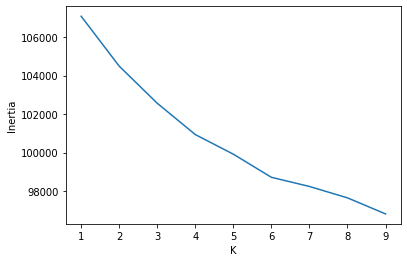

In [22]:
data_plot = pd.DataFrame({"K":k_values, "Inertia":inertia_values})
sns.lineplot(x = "K", y = "Inertia", data=data_plot)

### Kmeans + TF-IDF

In [23]:
# fit with different value of K
k_values = [str(s) for s in range(1,10)]
inertia_values = np.array([KMeans(n_clusters = k, init= 'k-means++').fit(tfidf).inertia_ for k in range(1,10)])

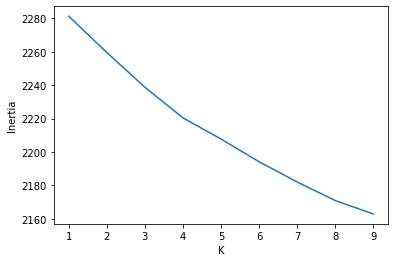

In [24]:
data_plot = pd.DataFrame({"K":k_values, "Inertia":inertia_values})
sns.lineplot(x = "K", y = "Inertia", data=data_plot)

### Kmeans + FastText

In [25]:
# fit with different value of K
k_values = [str(s) for s in range(1,10)]
inertia_values = np.array([KMeans(n_clusters = k, init= 'k-means++').fit(FastText_Vec).inertia_ for k in range(1,10)])

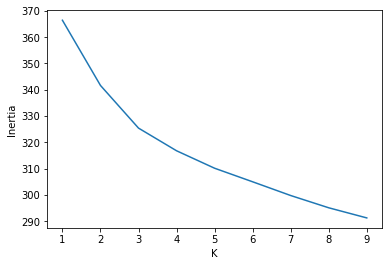

In [26]:
data_plot = pd.DataFrame({"K":k_values, "Inertia":inertia_values})
sns.lineplot(x = "K", y = "Inertia", data=data_plot)

#### Kmeans + FastText prediction

In [30]:
df['fasttext_cluster'] = KMeans(n_clusters = 3, init= 'k-means++').fit_predict(FastText_Vec)

In [33]:
df.loc[:][['question_text', 'question_text', 'fasttext_cluster']]

,question_text,question_text,fasttext_cluster
0,سلام ایا خوردن آب دهان نا محرم اشکال دارد؟,سلام ایا خوردن آب دهان نا محرم اشکال دارد؟,2
1,سلام،لباس نجسی انداخیم ماشین لباسشویی،بعدازاتم...,سلام،لباس نجسی انداخیم ماشین لباسشویی،بعدازاتم...,0
2,سلام اگر مرد آلت تناسلیش را تحریک کند ولی منی ...,سلام اگر مرد آلت تناسلیش را تحریک کند ولی منی ...,2
3,با سلام. اگر لباسی نجس شده باشد آیا میتوان آن...,با سلام. اگر لباسی نجس شده باشد آیا میتوان آن...,0
4,یعنی باید غسل کنم,یعنی باید غسل کنم,1
...,...,...,...
2324,سلام اگه کسی بخاد ازهمسرش جدابشه میتونه بره پی...,سلام اگه کسی بخاد ازهمسرش جدابشه میتونه بره پی...,1
2325,فاصله یک وجبی زن از مرد در نماز، از سجدگاه مرد...,فاصله یک وجبی زن از مرد در نماز، از سجدگاه مرد...,1
2326,سلام اگر متوجه بشیم ، یه نفر غسلی که انجام داد...,سلام اگر متوجه بشیم ، یه نفر غسلی که انجام داد...,0
2327,باسلام آیادعایی هست برای خوش اخلاقی زن ومهرومح...,باسلام آیادعایی هست برای خوش اخلاقی زن ومهرومح...,2
